# A3 - Learn an XOR Neural Network using gradient-based optimization

This notebook shows some cool implementation and analyses of different neural network architectures to learn the X-OR function. The X-OR function is a good benchmark test for beginners in neural networks and deep learning because it is a non-linear function that can not be learnd by a simple linear model like linear regression that we have seen in the previous course a lot. 

Each of the models will be trained using gradient descent to minimize the loss function which in this case will be the mean squared error (MSE) between the predictions and true outputs.

For comparison, the models will also be implemented using TensorFlow and Keras.

This notebook will only cover chapter 1.2 which is a setup and 1.5 which is a implementation of of a Neural Networking using ReLu as an activation function and with some backpropagation.

## 1.2 Setting the scene

In this section, i will first import the required libraries for this assignment and also explain the X-OR function. I will also show the main "metric" that will be used which is MSE. In the example, MSE is implemented manually but i think there is a built-in function that does that but i will also show how to implement it manually just in case.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def mse(ws, m, X, Y):
    N = len(X)
    err = 0
    for i in range(N):
        xi = X[i]
        yi = m(ws, xi)
        err += (Y[i] - yi) ** 2
    return err / N

THis is the XOR input and output

In [5]:
# XOR input and output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([[0], [1], [1], [0]])

Theese are the utility functions that i use as my activation functions and hidden layer.

In [6]:
def relu(z):           return np.maximum(0, z)
def relu_derivative(z):     return (z > 0).astype(float)
def sigmoid(z):        return 1/(1+np.exp(-z))
def sigmoid_derivative(z):  s = sigmoid(z); return s*(1-s)

This is the code that i use to make an individual predicttion. This is a two-layered Neural network as we first make use a relu-activation and then use a sigmoid activation. The ReLu will turn all negative values in to 0 and the sigmoid will also have an effect of squashing the output so we get a value of 0 to 1.

In [7]:
def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    return sigmoid(z2)

This is the main codes that does the training. Here we use backpropagation as well as a forward pass. This should theoretically be an improvement over the example because in this code we will now make improvements of as the model gets trained as opposed to just making predictive passes without double checking what was recently trained.

I did replicate the example a bit so i used a learning rate of 1.5 and also 500 epochs

We can also modify the amount of ReLu layers we want by changing the `hidden_layers` variable.

In [8]:
#Initialize weights
np.random.seed(1)

X = np.array(X)
Y = np.array(Y)


input_dimension = 2 # must be 2 for XOR
hidden_dimension = 10
output_dimension = 1 # must be 1

W1 = np.random.randn(input_dimension, hidden_dimension)
b1 = np.zeros((1, hidden_dimension))
W2 = np.random.randn(hidden_dimension, output_dimension)
b2 = np.zeros((1, output_dimension))

#Training loop
epochs = 500
learning_rate = 1.5 # same as learning_eps in example
loss_history = []

for epoch in range(epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

#Loss (MSE)
    loss = np.mean((A2 - Y) ** 2)
    loss_history.append(loss)

#Backpropagation
    dA2 = 2 * (A2 - Y) / Y.shape[0]
    dZ2 = dA2 * sigmoid_derivative(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


print("\nPredictions after training:")
for x, y in zip(X, Y):
    pred = predict(x.reshape(1, -1))
    print(f"Input: {x}, Predicted: {pred.round()}, True: {y}")

Epoch 0, Loss: 0.3051
Epoch 20, Loss: 0.0828
Epoch 40, Loss: 0.0324
Epoch 60, Loss: 0.0176
Epoch 80, Loss: 0.0110
Epoch 100, Loss: 0.0078
Epoch 120, Loss: 0.0059
Epoch 140, Loss: 0.0047
Epoch 160, Loss: 0.0039
Epoch 180, Loss: 0.0033
Epoch 200, Loss: 0.0029
Epoch 220, Loss: 0.0025
Epoch 240, Loss: 0.0022
Epoch 260, Loss: 0.0020
Epoch 280, Loss: 0.0018
Epoch 300, Loss: 0.0017
Epoch 320, Loss: 0.0015
Epoch 340, Loss: 0.0014
Epoch 360, Loss: 0.0013
Epoch 380, Loss: 0.0012
Epoch 400, Loss: 0.0012
Epoch 420, Loss: 0.0011
Epoch 440, Loss: 0.0010
Epoch 460, Loss: 0.0010
Epoch 480, Loss: 0.0009

Predictions after training:
Input: [0 0], Predicted: [[0.]], True: [0]
Input: [0 1], Predicted: [[1.]], True: [1]
Input: [1 0], Predicted: [[1.]], True: [1]
Input: [1 1], Predicted: [[0.]], True: [0]


Then we can plot it!

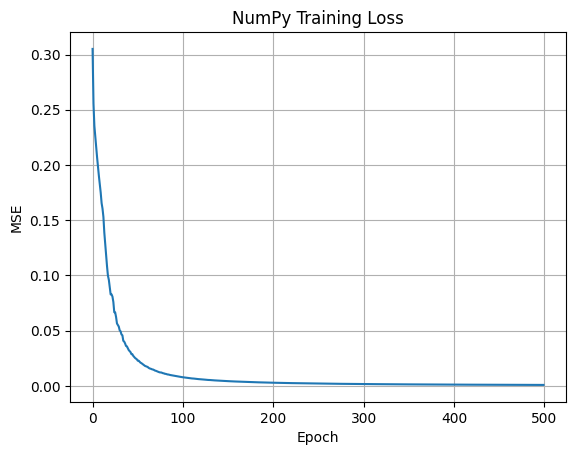

Final XOR preds: [[0.04852618]
 [0.98003239]
 [0.97855588]
 [0.01685806]]
Accuracy: 1.0


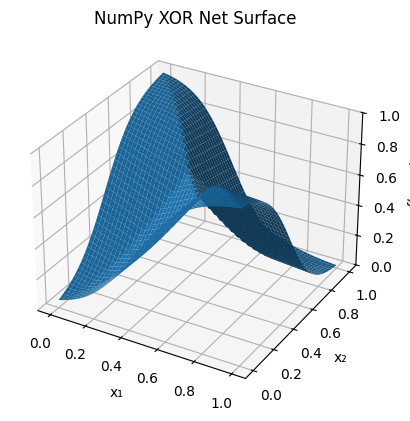

In [9]:
# PLOT LOSS & ACCURACY
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("NumPy Training Loss")
plt.grid(True)
plt.show()

preds = predict(X)

preds_binary = (preds > 0.5).astype(int)

acc = np.mean(preds_binary.squeeze() == Y.squeeze())

print("Final XOR preds:", preds)
print("Accuracy:", acc)

# SURFACE PLOT
grid = 50
xs = np.linspace(0,1,grid); ys = np.linspace(0,1,grid)
Xg,Yg = np.meshgrid(xs,ys)
pts = np.column_stack([Xg.ravel(), Yg.ravel()])
Z1g = pts @ W1 + b1
A1g = relu(Z1g)
Z2g = A1g @ W2 + b2
A2g = sigmoid(Z2g)
Zg  = A2g.reshape(Xg.shape)


fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Zg)
ax.set_xlabel('x₁'); ax.set_ylabel('x₂'); ax.set_zlabel('f(x₁,x₂)')
ax.set_title('NumPy XOR Net Surface')
plt.show()

## Short interpretation

At epoch 1, the loss starts around 0.314 which is just the average squared difference between the random initial outputs and the targets. The MSE then drops very fast and at epoch 80 we are already at 0.037 and by epoch 100 we are already at 0.013 MSE.

After epoch 400 we can see that MSE converges to 0. This tells us that we pretty much have a perfect classification accuracy.

The final thresholded prediction is [0, 1, 1, 0]. This is thanks to the sigmoid layer just flipping the raw numericall outputs which are [0.048, 0.98, 0.979, 0.016] to 0's and 1's.

From the surface plot we can see that the unit square smoothly transitions between 0 and 1. The valley of the plot shows us how the two layer network implements the XOR decision boundary.


## 1.6. TensorFlot comparison

I will now try to implement the same function but in tensorflow. I pretty much just combined all of the previous cells in to one and then used tensorflow operations and syntax for everything just to try and make sure so that the numpy implementation doesent "leak into" this tensorflow implementation.

TensorFlow version: 2.19.0
Epoch 0, Loss: 0.4084
Epoch 20, Loss: 0.1162
Epoch 40, Loss: 0.0397
Epoch 60, Loss: 0.0179
Epoch 80, Loss: 0.0105
Epoch 100, Loss: 0.0072
Epoch 120, Loss: 0.0054
Epoch 140, Loss: 0.0042
Epoch 160, Loss: 0.0035
Epoch 180, Loss: 0.0029
Epoch 200, Loss: 0.0025
Epoch 220, Loss: 0.0022
Epoch 240, Loss: 0.0020
Epoch 260, Loss: 0.0018
Epoch 280, Loss: 0.0016
Epoch 300, Loss: 0.0015
Epoch 320, Loss: 0.0013
Epoch 340, Loss: 0.0012
Epoch 360, Loss: 0.0012
Epoch 380, Loss: 0.0011
Epoch 400, Loss: 0.0010
Epoch 420, Loss: 0.0010
Epoch 440, Loss: 0.0009
Epoch 460, Loss: 0.0009
Epoch 480, Loss: 0.0008

Predictions after training:
Input: [0. 0.], Predicted: [0.], True: [0.]
Input: [0. 1.], Predicted: [1.], True: [1.]
Input: [1. 0.], Predicted: [1.], True: [1.]
Input: [1. 1.], Predicted: [0.], True: [0.]


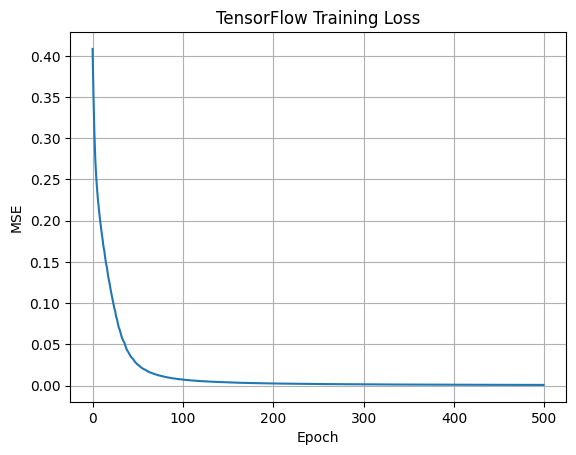

Final XOR preds: [[0.04663704]
 [0.98344207]
 [0.98039705]
 [0.01546111]]
Accuracy: 1.0


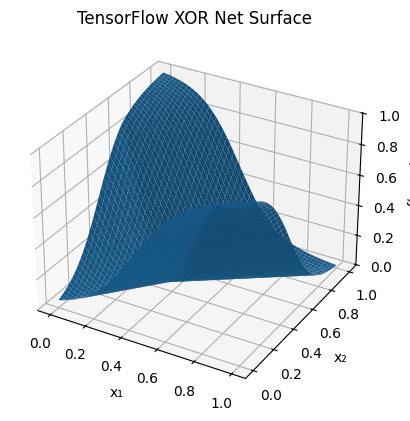

In [10]:
#!pip install tensorflow
import tensorflow as tf

print("TensorFlow version:", tf.__version__) # verify that TF works

# XOR input and output
X_np = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
Y_np = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.constant(X_np)
Y = tf.constant(Y_np)

# Activation functions
def relu(z):           return tf.nn.relu(z)
def relu_deriv(z):     return tf.cast(z > 0, tf.float32)
def sigmoid(z):        return tf.nn.sigmoid(z)
def sigmoid_deriv(z):  s = sigmoid(z); return s * (1 - s)

# Initialize weights and biases
tf.random.set_seed(1)
input_dim, hidden_dim, output_dim = 2, 10, 1
W1 = tf.Variable(tf.random.normal([input_dim, hidden_dim]))
b1 = tf.Variable(tf.zeros([1, hidden_dim]))
W2 = tf.Variable(tf.random.normal([hidden_dim, output_dim]))
b2 = tf.Variable(tf.zeros([1, output_dim]))

# Training loop
epochs = 500
lr = 1.5
loss_history = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        Z1 = tf.matmul(X, W1) + b1
        A1 = relu(Z1)
        Z2 = tf.matmul(A1, W2) + b2
        A2 = sigmoid(Z2)

        loss = tf.reduce_mean(tf.square(Y - A2))
        loss_history.append(loss.numpy())

    # Compute gradients and update
    grads = tape.gradient(loss, [W1, b1, W2, b2])
    W1.assign_sub(lr * grads[0])
    b1.assign_sub(lr * grads[1])
    W2.assign_sub(lr * grads[2])
    b2.assign_sub(lr * grads[3])

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Prediction function
def predict(x):
    z1 = tf.matmul(x, W1) + b1
    a1 = relu(z1)
    z2 = tf.matmul(a1, W2) + b2
    return sigmoid(z2)

print("\nPredictions after training:")
for x, y in zip(X_np, Y_np):
    pred = predict(tf.constant(x.reshape(1, -1), dtype=tf.float32))
    print(f"Input: {x}, Predicted: {tf.round(pred).numpy().flatten()}, True: {y}")

# Plot training loss
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("TensorFlow Training Loss")
plt.grid(True)
plt.show()

# Accuracy
preds = predict(X)
acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(preds), Y), tf.float32))
print("Final XOR preds:", preds.numpy())
print("Accuracy:", acc.numpy())

# Surface plot
grid = 50
xs = np.linspace(0,1,grid); ys = np.linspace(0,1,grid)
Xg, Yg = np.meshgrid(xs, ys)
pts = np.column_stack([Xg.ravel(), Yg.ravel()])
pts_tf = tf.constant(pts, dtype=tf.float32)

Z1g = tf.matmul(pts_tf, W1) + b1
A1g = relu(Z1g)
Z2g = tf.matmul(A1g, W2) + b2
A2g = sigmoid(Z2g)
Zg  = tf.reshape(A2g, Xg.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Zg.numpy())
ax.set_xlabel('x₁'); ax.set_ylabel('x₂'); ax.set_zlabel('f(x₁,x₂)')
ax.set_title('TensorFlow XOR Net Surface')
plt.show()

## Short interpreataion

As we can see, the structure of the output is very similar to the "primitive" numpy implementation that i used. Because tensorflow is a different framework from numpy, the RNG probably is different so the initial data will probably differ from the first implementation but i did use 1 as my random seed just to keep the code consistent.

From the looks of it, the Epoch 0 loss is higher in tensorflow than in numpy but as we come to epoch 100 we actually get a lower MSE of about 0.0072 which means that the tensorflow implementation that i used converges to 0 a bit faster than numpy and at epoch 480 tensorflow is at 0.0008 while numpy is at 0.0009. 

the final raw numerical output is: [[0.04663704], [0.98344207], [0.98039705],[0.01546111]] 

All in all, the difference is quite small from the numpy implementation.